In [1]:
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(101)
tf.set_random_seed(1010)

In [3]:
rand_a = np.random.uniform(0,100, (5,5))

In [4]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0, 100, (5,1))

In [6]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [8]:
add_op = a + b

In [9]:
mul_op = a * b

In [10]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a: rand_a, b: rand_b})
    print(add_result)
    print('\n')
    mult_result = sess.run(mul_op, feed_dict={a: rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [11]:
n_features = 10

In [12]:
n_dense_neurons = 3

In [13]:
x = tf.placeholder(tf.float32, (None, n_features))
# None = variant rows of data

In [14]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [36]:
b = tf.Variable(tf.ones([n_dense_neurons]))
b

<tf.Variable 'Variable_5:0' shape=(3,) dtype=float32_ref>

In [16]:
Wx = tf.matmul(x, W)

In [17]:
z = tf.add(Wx, b)

In [18]:
a = tf.sigmoid(z)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, 
                         feed_dict={x: np.random.random([1, n_features])})
    


In [21]:
print(layer_out)

[[0.9254598  0.2954587  0.30858606]]


## Simple Regression Example

In [22]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [23]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [24]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [25]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

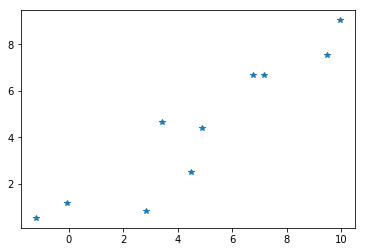

In [26]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_data, y_label, '*')

In [27]:
# y = mx + b

In [28]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [29]:
m = tf.Variable(0.47816742)
b = tf.Variable(0.94926413)

In [38]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    
    error += (y-y_hat)**2
    
print('error', error)

error Tensor("add_60:0", shape=(3,), dtype=float32)


In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [32]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

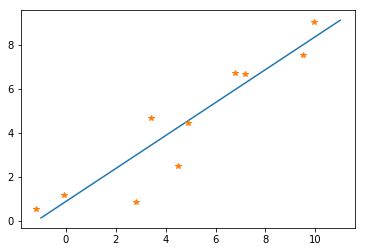

In [34]:
x_test = np.linspace(-1, 11, 10)

# y = mx+b
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test, y_pred_plot)
plt.plot(x_data, y_label, '*')